In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

In [481]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [482]:
file_path = '/content/drive/MyDrive/bk/processed.hungarian.data'

In [ ]:
with open(file_path, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

In [ ]:
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame(data)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name
5,1259,0,39,1,1,0,1,-9,3,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
6,1260,0,45,0,0,1,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
7,1261,0,54,1,1,0,0,-9,2,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
8,1262,0,37,1,1,1,1,-9,4,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
9,1263,0,48,0,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [ ]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)
df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [ ]:
df.replace(-9.0, np.nan, inplace=True)

In [ ]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


<ipython-input-385-b35476392aaf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [ ]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [ ]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [ ]:
meanTBPS = round(df_selected['trestbps'].dropna().astype(float).mean())
meanChol = round(df_selected['chol'].dropna().astype(float).mean())
meanFbs = round(df_selected['fbs'].dropna().astype(float).mean())
meanRestEcg = round(df_selected['restecg'].dropna().astype(float).mean())
meanThalach = round(df_selected['thalach'].dropna().astype(float).mean())
meanExang = round(df_selected['exang'].dropna().astype(float).mean())

fill_values = {
    'trestbps': meanTBPS,
    'chol': meanChol,
    'fbs': meanFbs,
    'thalach': meanThalach,
    'exang': meanExang,
    'restecg': meanRestEcg
}
df_clean = df_selected.fillna(value=fill_values)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
duplicate_rows = df_clean.duplicated()
df_clean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
df_clean = df_clean.drop_duplicates()
df_clean[df_clean.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
df_clean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

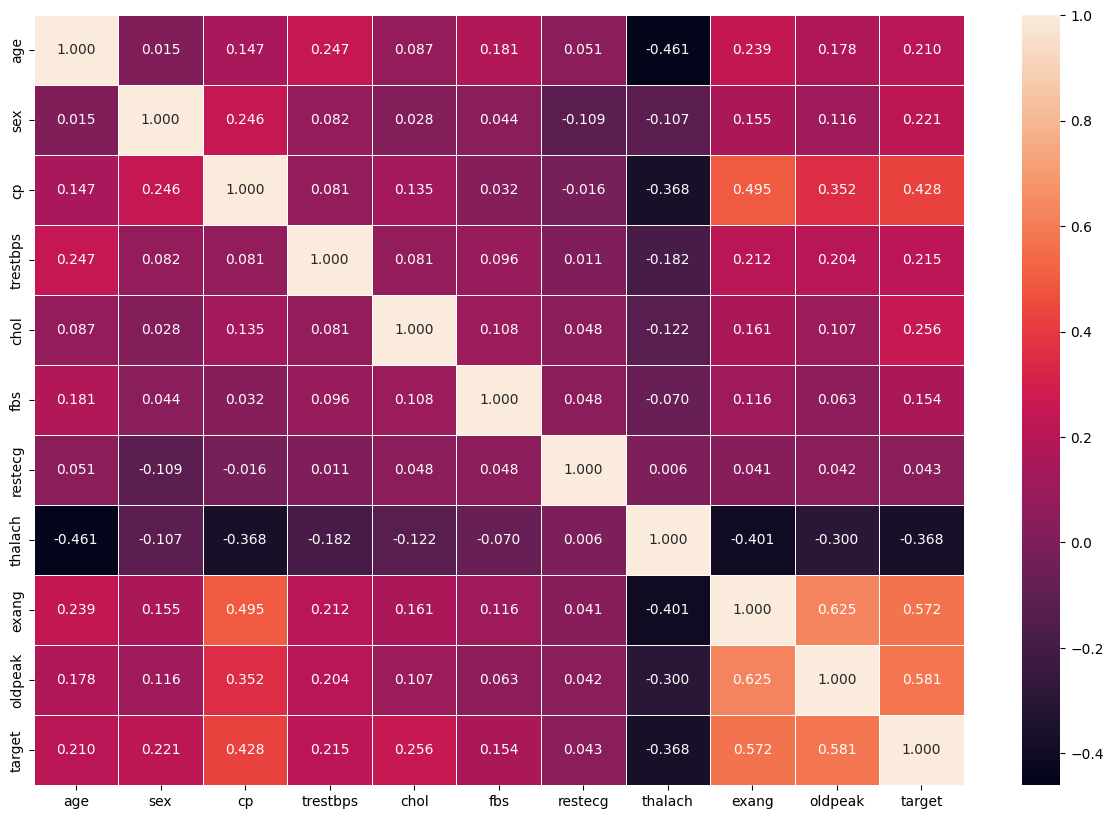

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt=".3f")

In [ ]:
X = df_clean.drop("target", axis=1).values
y = df_clean.iloc[:, -1]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

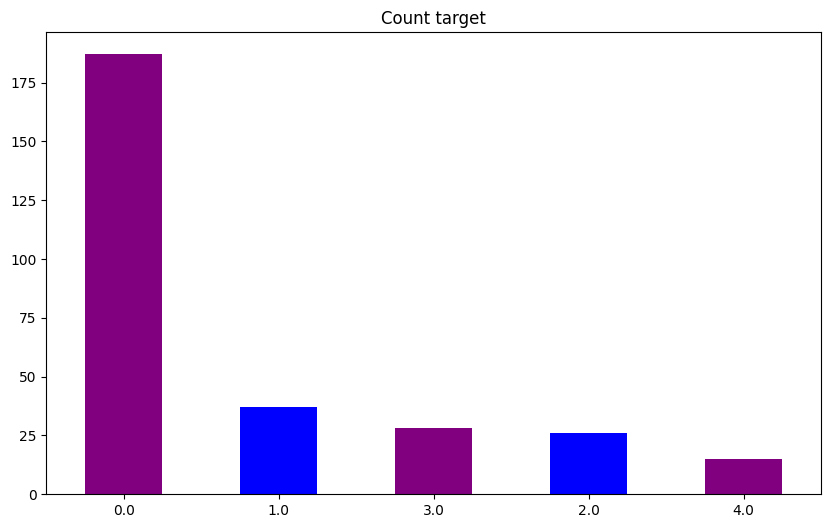

In [ ]:
df_clean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['purple', 'blue'])
plt.title("Count target")
plt.xticks(rotation=0)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

new_df1 = pd.DataFrame(data=y)
new_df2 = pd.DataFrame(data=y_smote_resampled)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

In [ ]:
df_check1 = pd.DataFrame(X_smote_resampled_normal)
df_check1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

def evaluation(y_test, y_pred):
    return print({
        'accuracy': round(accuracy_score(y_test, y_pred), 3),
        'recall': round(recall_score(y_test, y_pred, average='weighted'), 3),
        'f1_score': round(f1_score(y_test, y_pred, average='weighted'), 3),
        'precision_score': round(precision_score(y_test, y_pred, average='weighted'), 3)
    })

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print("KNN Model:")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy: ", accuracy_knn_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn))

KNN Model:
Accuracy:  0.754
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [ ]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'f1_score': 0.741, 'precision_score': 0.745}


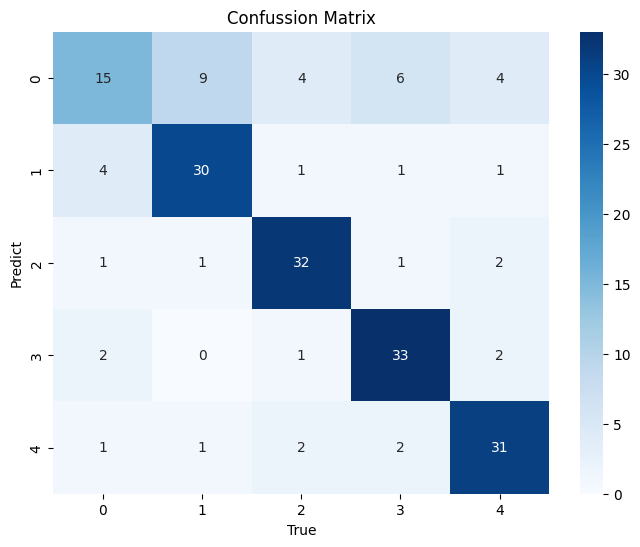

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_rf))

Random Forest Model:
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1_score': 0.92, 'precision_score': 0.922}


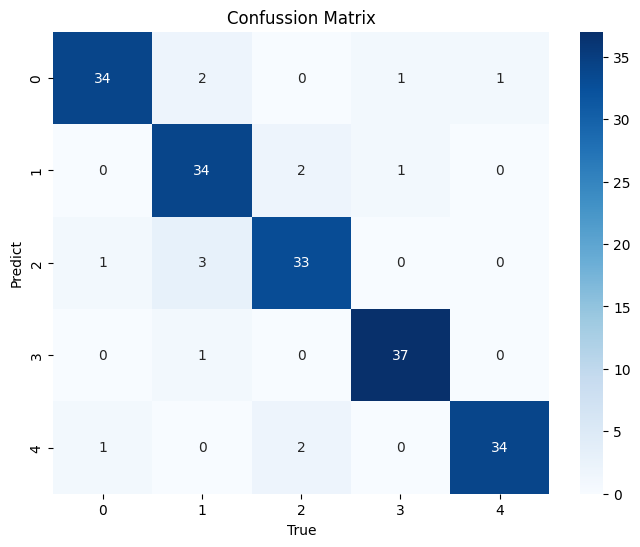

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print("XGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy: ", accuracy_xgb_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model:
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1_score': 0.904, 'precision_score': 0.906}


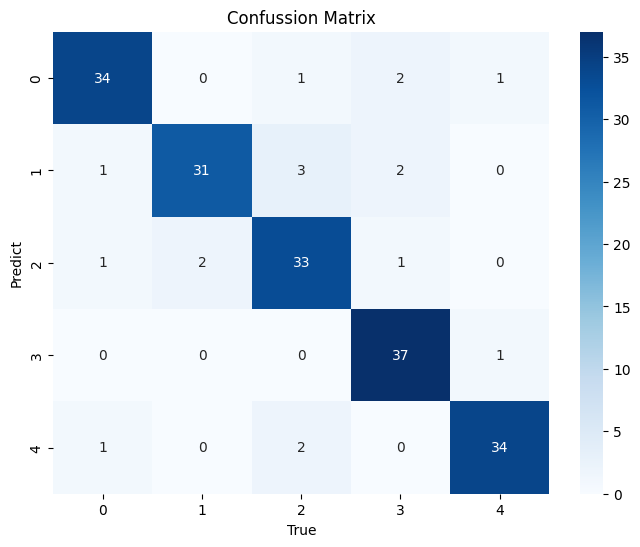

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

In [ ]:
print("KNN Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy: ", accuracy_knn_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

KNN Model:
Accuracy:  0.861
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [ ]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'f1_score': 0.861, 'precision_score': 0.863}


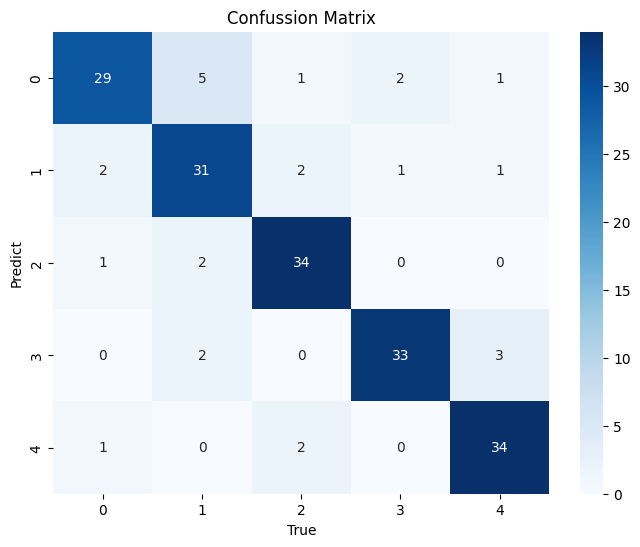

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_rf))

Random Forest Model:
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1_score': 0.92, 'precision_score': 0.922}


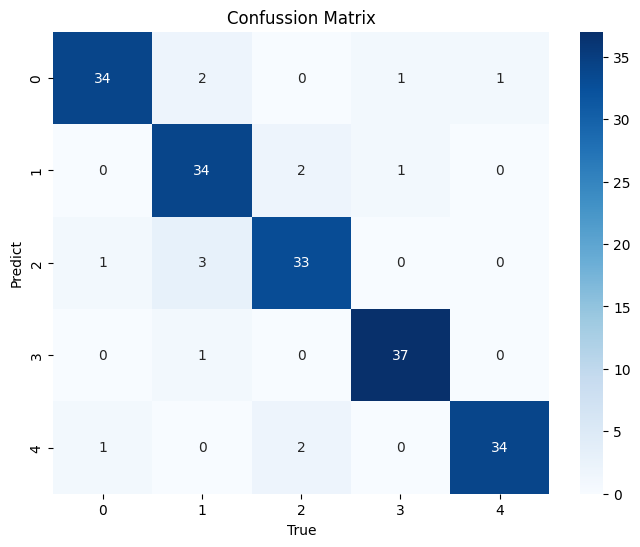

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print("XGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy: ", accuracy_xgb_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model:
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1_score': 0.904, 'precision_score': 0.906}


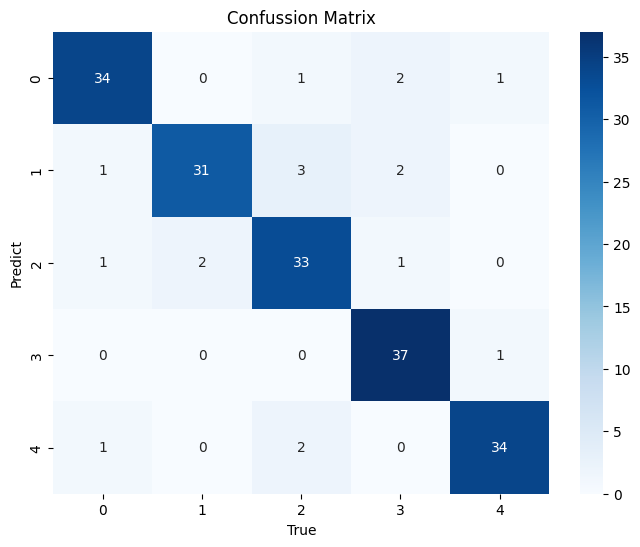

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

In [ ]:
print("KNN Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy: ", accuracy_knn_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

KNN Model:
Accuracy:  0.861
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [ ]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'f1_score': 0.861, 'precision_score': 0.863}


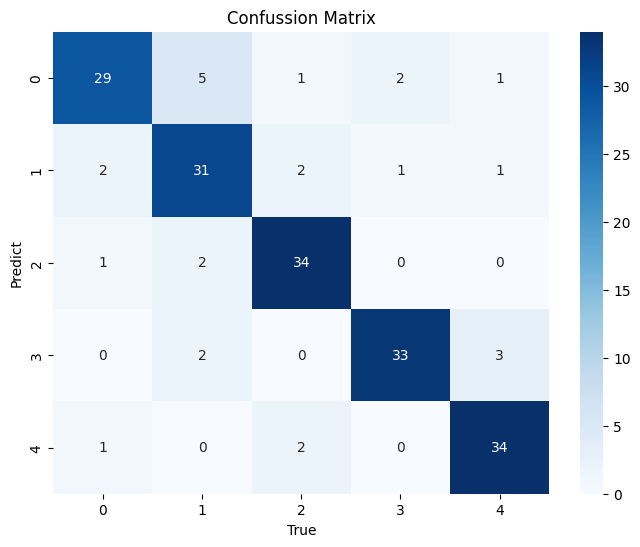

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

In [ ]:
print("Random Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model:
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1_score': 0.92, 'precision_score': 0.922}


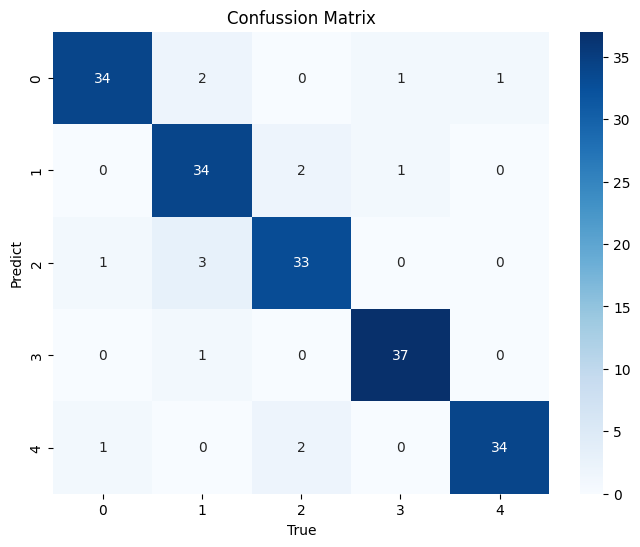

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [ ]:
print("XGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy: ", accuracy_xgb_smote_normal)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model:
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1_score': 0.904, 'precision_score': 0.906}


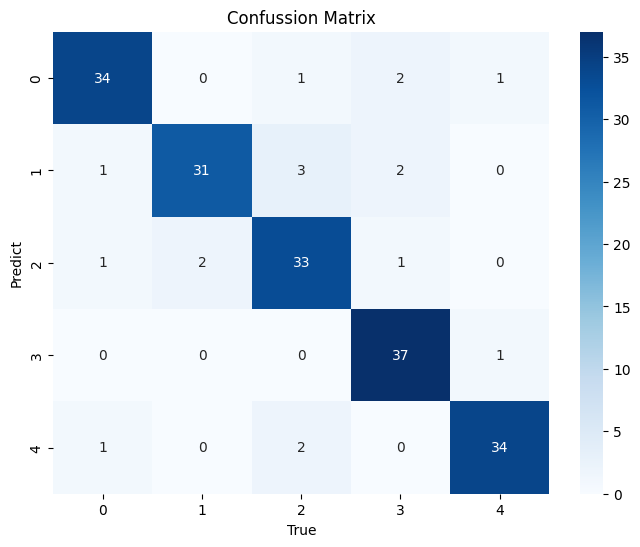

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 52, 'algorithm': 'auto'}


In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

In [ ]:
print("KNN Model:")
accuracy_knn_smote_normal_tunning = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy: ", accuracy_knn_smote_normal_tunning)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

KNN Model:
Accuracy:  0.93
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [ ]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.93, 'recall': 0.93, 'f1_score': 0.93, 'precision_score': 0.93}


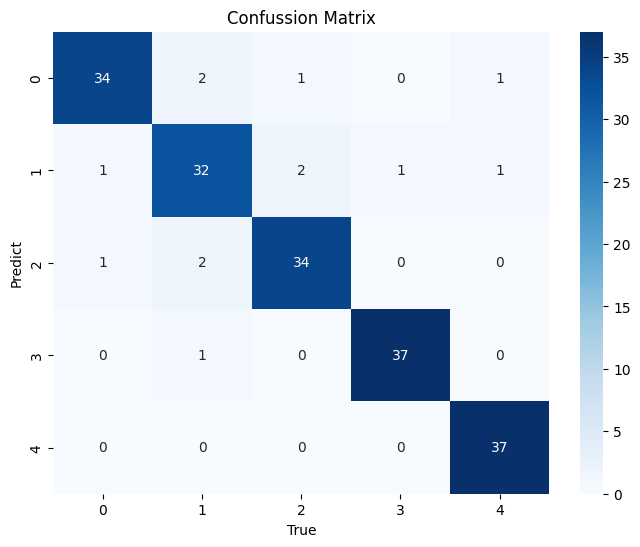

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best Parameters: {best_params})")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15})


In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

In [ ]:
print("Random Forest Model:")
accuracy_rf_smote_normal_tunning = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote_normal_tunning)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model:
Accuracy:  0.909
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.86      0.84      0.85        37
         2.0       0.85      0.89      0.87        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.909, 'recall': 0.909, 'f1_score': 0.909, 'precision_score': 0.91}


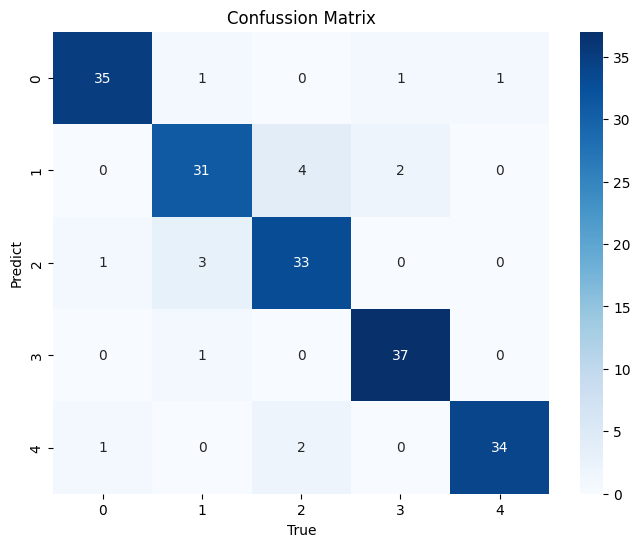

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best Parameters: {best_params})")

Best Parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7})


In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [ ]:
print("XGBoost Model:")
accuracy_xgb_smote_normal_tunning = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy: ", accuracy_xgb_smote_normal_tunning)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model:
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.91      0.86      0.89        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.92, 'recall': 0.92, 'f1_score': 0.919, 'precision_score': 0.92}


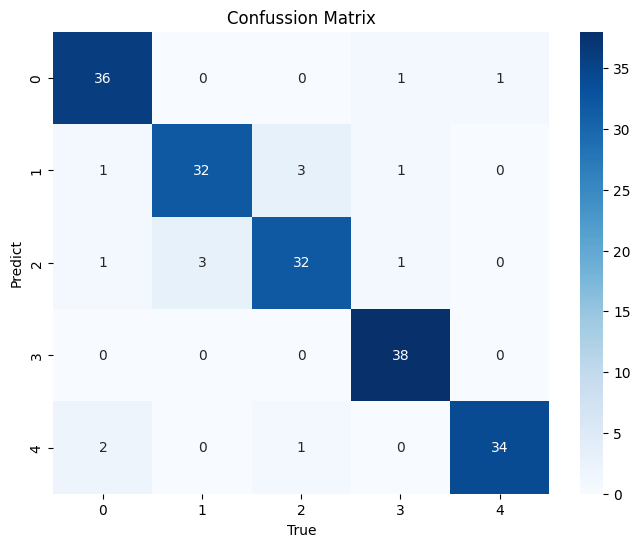

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_comp1 = pd.DataFrame({
    'Model': [
        'KNN',
        'Random Forest',
        'XGBoost'
    ],
    'Accuracy': [
        accuracy_knn_smote*100,
        accuracy_rf_smote*100,
        accuracy_xgb_smote*100
    ]
})

model_comp1.head()

,Model,Accuracy
0,KNN,75.4
1,Random Forest,92.0
2,XGBoost,90.4


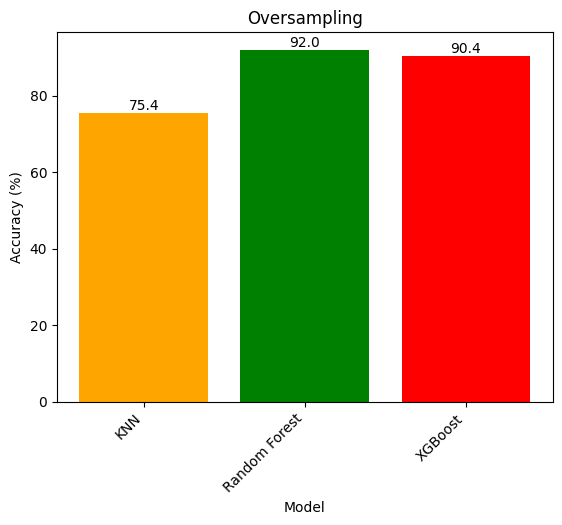

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['orange', 'green', 'red'])
plt.title("Oversampling")
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp2 = pd.DataFrame({
    'Model': [
        'KNN',
        'Random Forest',
        'XGBoost'
    ],
    'Accuracy': [
        accuracy_knn_smote_normal*100,
        accuracy_rf_smote_normal*100,
        accuracy_xgb_smote_normal*100
    ]
})

model_comp2.head()

,Model,Accuracy
0,KNN,86.1
1,Random Forest,92.0
2,XGBoost,90.4


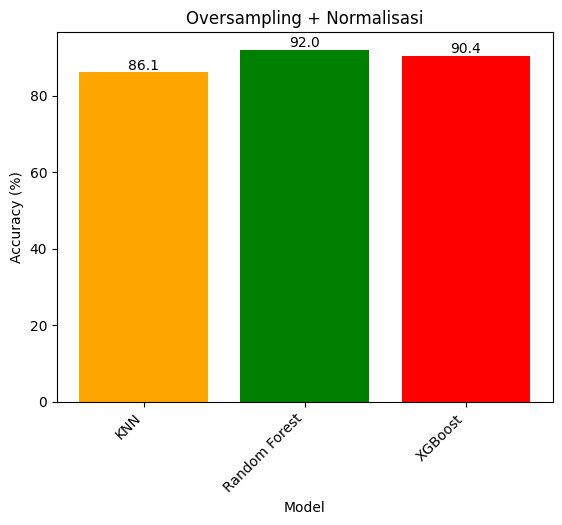

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['orange', 'green', 'red'])
plt.title("Oversampling + Normalisasi")
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp3 = pd.DataFrame({
    'Model': [
        'KNN',
        'Random Forest',
        'XGBoost'
    ],
    'Accuracy': [
        accuracy_knn_smote_normal_tunning*100,
        accuracy_rf_smote_normal_tunning*100,
        accuracy_xgb_smote_normal_tunning*100
    ]
})

model_comp3.head()

,Model,Accuracy
0,KNN,93.0
1,Random Forest,90.9
2,XGBoost,92.0


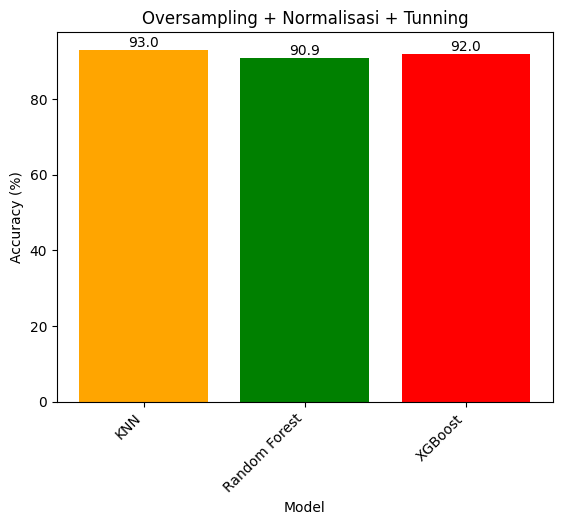

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['orange', 'green', 'red'])
plt.title("Oversampling + Normalisasi + Tunning")
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp_best = pd.DataFrame({
    'Model': [
        'KNN (Oversampling + Normalisasi + Tunning)',
        'Random Forest (Oversampling)',
        'XGBoost (Oversampling + Normalisasi)'
    ],
    'Accuracy': [
        accuracy_knn_smote_normal_tunning*100,
        accuracy_rf_smote*100,
        accuracy_xgb_smote_normal*100
    ]
})

model_comp_best.head()

,Model,Accuracy
0,KNN (Oversampling + Normalisasi + Tunning),93.0
1,Random Forest (Oversampling),92.0
2,XGBoost (Oversampling + Normalisasi),90.4


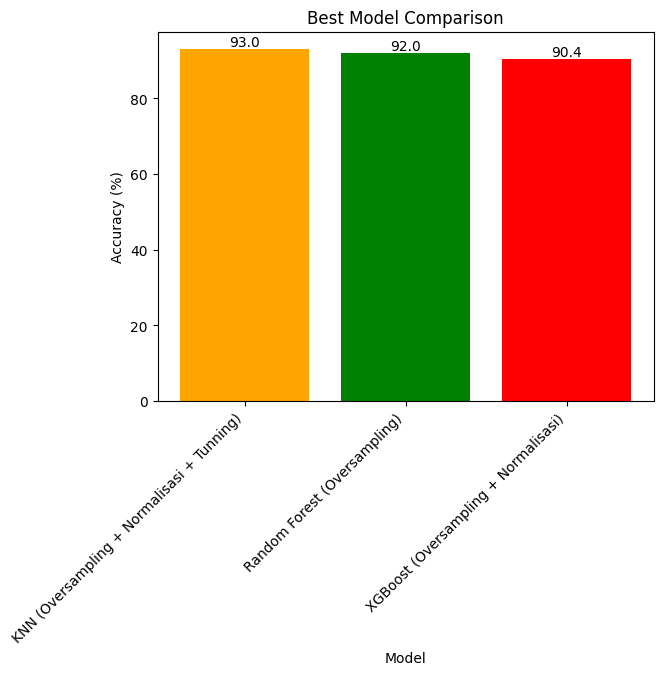

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp_best['Model'], model_comp_best['Accuracy'], color=['orange', 'green', 'red'])
plt.title("Best Model Comparison")
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
import joblib

joblib.dump(knn_model, 'knn.joblib')

['knn.joblib']